In [ ]:
import cv2  # OpenCV (Computer Vision)
import os  # Operating system interactions
import numpy as np  # Numerical operations
import pandas as pd  # Data manipulation
import seaborn as sns  # Statistical data visualization
import random  # Generating random numbers
import matplotlib.pyplot as plt  # Plotting/Visualization
import tensorflow as tf  
from sklearn.utils import shuffle  # Utility for shuffling
import glob


from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split  # Splitting data
from tensorflow.keras.callbacks import EarlyStopping  # Callbacks
from PIL import Image  # Python Imaging Library

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [24]:
# Contoh Path Windows (Slash Miring)
base_path = 'C:/Users/Hype/Documents/coding-project/tumor-detection/dataset' 

path_Yes = f'{base_path}/tumor/*'
path_No = f'{base_path}/notumor/*'

tumor = []
no_tumor = []
random_state = 42

for file in glob.iglob(path_Yes):
    img = cv2.imread(file)      #Reading the images from the path
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)        #Changing the color from BGR to RGB
    img = cv2.resize(img, (128, 128)) 
    tumor.append((img, 1))  # Appending tuple with image and label 1 (indicating presence of tumor)

for file in glob.iglob(path_No):
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (128, 128))
    no_tumor.append((img, 0))  # Appending tuple with image and label 0 (indicating absence of tumor)

# Concatenating the two lists and shuffle the data
all_data = tumor + no_tumor

print(f"Tumor images loaded: {len(tumor)}")
print(f"No-tumor images loaded: {len(no_tumor)}")
# Splitting data and labels
data = np.array([item[0] for item in all_data])
labels = np.array([item[1] for item in all_data])


Tumor images loaded: 155
No-tumor images loaded: 98


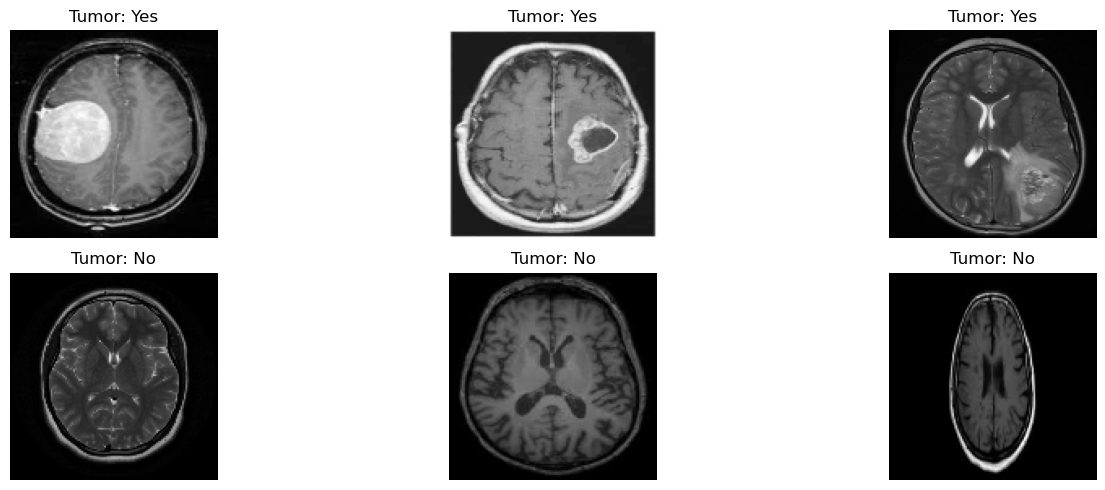

In [25]:
plt.figure(figsize=(15, 5))

# Display tumor images with label 'yes'
for i in range(3):
    plt.subplot(2, 3, i+1)
    plt.imshow(tumor[i][0])  
    plt.title("Tumor: Yes")  
    plt.axis('off')

# Display no_tumor images with label 'no'
for i in range(3):
    plt.subplot(2, 3, i+4)
    plt.imshow(no_tumor[i][0])  
    plt.title("Tumor: No")  
    plt.axis('off')

plt.tight_layout()
plt.show()


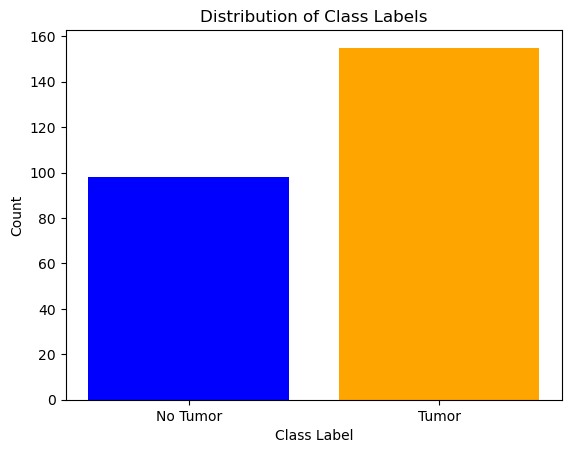

In [26]:
# Counting the occurrences of each class label
unique_labels, label_counts = np.unique(labels, return_counts=True)

plt.bar(unique_labels, label_counts, color=['blue', 'orange'])
plt.xticks(unique_labels, ['No Tumor', 'Tumor'])
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Distribution of Class Labels')
plt.show()


In [27]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.20, random_state=42)


In [28]:
# Assuming x_train and x_test are your image datasets



# Normalize the pixel values to the range [0, 1]
x_train= x_train /255.0
x_test = x_test / 255.0


In [29]:
print("Minimum value of the scaled data:", x_train.min())
print("Maximum value of the scaled data:",  x_train.max())


Minimum value of the scaled data: 0.0
Maximum value of the scaled data: 1.0


In [30]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


In [31]:
model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])


In [32]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
# Define callbacks function
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.99:
            print("\nReached 99% accuracy so cancelling training!")
            self.model.stop_training = True
            
back = myCallback()     

In [34]:
history = model.fit(x_train, 
                    y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                   callbacks=[back])


Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 271ms/step - accuracy: 0.6460 - loss: 0.6271 - val_accuracy: 0.8049 - val_loss: 0.5305
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 233ms/step - accuracy: 0.7826 - loss: 0.5082 - val_accuracy: 0.7805 - val_loss: 0.5071
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 255ms/step - accuracy: 0.7764 - loss: 0.5105 - val_accuracy: 0.8049 - val_loss: 0.4934
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 228ms/step - accuracy: 0.7888 - loss: 0.4978 - val_accuracy: 0.8293 - val_loss: 0.4241
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 228ms/step - accuracy: 0.7950 - loss: 0.4751 - val_accuracy: 0.8780 - val_loss: 0.3899
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 218ms/step - accuracy: 0.7081 - loss: 0.5627 - val_accuracy: 0.7805 - val_loss: 0.4765
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 252ms/step - accuracy: 0.7888 - loss: 0.4920 - val_accuracy: 0.7805 - val_loss: 0.4890
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 252ms/step - accuracy: 0.8261 - loss: 0.4803 - val_accuracy: 0.8049 - v

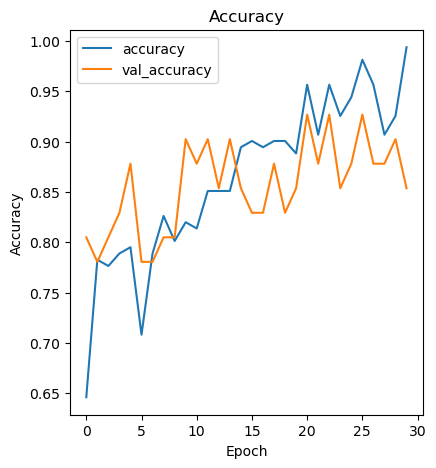

In [35]:
# plot the accuracy and loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()


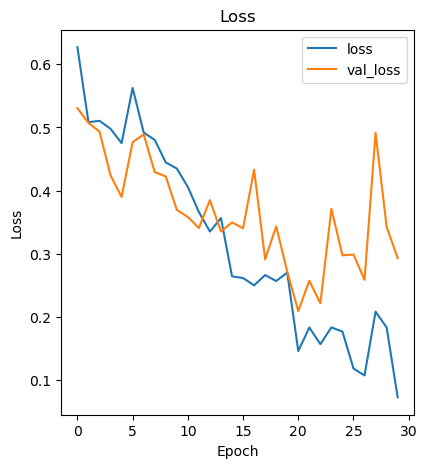

In [36]:
# model loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss")
plt.show()


In [37]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8431 - loss: 0.4051
Test Loss: 0.4051235318183899
Test Accuracy: 0.843137264251709


In [38]:
# Assuming 'model' is your trained Keras model
model.save("model_tumor.h5")
